## План исследования
####  1. Открытие файла с данными и изучение общей информации
* Вывод

####  2. Подготовка данных

* Приведение к нижнему регистру столбцов и данных
* Обработка пропусков
* Обработка ошибок в данных
* Преобразование данных в нужные типы
* Проверка дубликатов
* Добавочные данные
* Вывод

####  3. Исследовательский анализ данных

* Изучение количества игр выпускавшихся в разные годы. Их важость.
* Изменения продаж по платформам. Выбор платформ с наибольшими суммарными продажами
>	* Выбор платформ с наибольшими суммарными продажами
>	* Построение распределений по годам платформ с наибольшими суммарными продажами
>	* Выбор нескольких потенциально прибыльных платформ
>	* Диаграмма размаха по глобальным продажам игр в разбивке по платформам.
* Изучение влияния отзывов пользователей и критиков на продажи игр для топовой платформы
>	* Соотношение продаж для PS4 с продажами игр на других платформах.
* Исследование общего распределения игр по жанрам. Прибыльность жанров
>	* Продажи жанров с высокими и низкими продажами
* Вывод

#### 4. Составление портрета пользователя каждого региона

* Топ 5 популярных платформ для пользователя каждого региона (NA, EU, JP).
* Топ-5 самых популярныех жанров пользователя каждого региона (NA, EU, JP)
* Изучение влияния рейтинга ESRB на продажи в отдельном регионе
* Вывод

#### 5. Проверка гипотез

* Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Вывод по гипотезе
* Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
* Вывод по гипотезе

#### 6. Общий вывод

## 1. Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
from math import factorial, ceil
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 35) # настройка отображения таблиц
sns.set(style="whitegrid")

In [2]:
file_data = './datasets/games.csv'
try:
    df = pd.read_csv(file_data)
except (IndexError) as err:
    print('Ошибка:', err)

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Вывод

Данные читаются, загружены, просмотрены "глазами". В таблице имеются пропуски . Имеется необходимость менять типы данных. User_Score не считается изза тип object.

## 2. Подготовка данных

### Приведение к нижнему регистру столбцов и данных

In [5]:
    # приведение к нижнему регистру столбцов
df.columns = df.columns.str.lower()

    # Приведение к нижнему регистру значений полей 'name' и 'genre'
df['name'] = df['name'].str.lower()
df['genre'] = df['genre'].str.lower()

### Обработка пропусков

Изучим пропуски и их количество

In [6]:
   # функция показывает количество пропусков в столбцах и и их процент.
   # Принимает Датафрейм
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [7]:
missing_data(df)

,Total,Percent
critic_score,8578,51.319174
rating,6766,40.478612
user_score,6701,40.089740
year_of_release,269,1.609333
genre,2,0.011965
name,2,0.011965
other_sales,0,0.000000
jp_sales,0,0.000000
eu_sales,0,0.000000
na_sales,0,0.000000


смотрим отсутствующие значение в поле 'name'

In [8]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в name совпадают с genre. Удаляем строки, так как восстановить категориальные данные не удастся. Потеря в данных составит 0.012%.

In [9]:
df.dropna(subset = ['name', 'genre'], inplace=True)

Проверяем 'year_of_release'. Что находится в пустых значениях.

In [10]:
df[df['year_of_release'].isna()].head(4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN


В некоторых названиях, в конце, имеются года, скорее всего релиза. попробуем их поставить в 'year_of_release'.

In [11]:
def get_year(row):
    if row[-2:].isdigit():
        yr = int(row[-2:])
        if 0 <= yr < 17:    #данные до 2016 года
            return float('20'+row[-2:])
        elif 80 < yr < 100:
            return float('19'+row[-2:])

In [12]:
before = df['year_of_release'].isnull().sum()
df['year_of_release'] = np.where(df['year_of_release'].isnull(), df['name'].apply(get_year), df['year_of_release'])
print('Обработано строк:', before - df['year_of_release'].isna().sum())

Обработано строк: 22


Остальные пропуски удаляем ~ 1.5%

In [13]:
df.dropna(subset =['year_of_release'], inplace = True) 
# на самом деле можно еще спасти 110 записей

Остальные пропуски являются рейтинговыми, их обрабатывать не стоит

<div class="alert alert-block alert-info">
Недоделка спасти 110 строк. из повторяющихся имен с имеющихся у них годами/ запутался :(
    
'''df[df['year_of_release'].isna()].sort_values('name')
df_isna = df[df['year_of_release'].isna()] 
df_notna = df[df['year_of_release'].notnull()]
df_isna['name'].isin(df_notna['name'])
d = df[df['year_of_release'].isna()]['name'].isin(df[df['year_of_release'].notnull()]['name'])
d.value_counts()'''

### Обработка ошибок в данных

Обработка 'tbd' («To Be Determined») - «предстоит определить» в столбце 'user_score' и RP («Rating Pending») — «Рейтинг ожидается» в 'rating'

In [14]:
print('значений "tbd":', df[df['user_score'] == 'tbd']['user_score'].count())
print('значений "RP":', df[df['rating'] == 'RP']['rating'].count())

значений "tbd": 2378
значений "RP": 1


Так как по факту значения не определены, то заменим их пропуском.

In [15]:
df['user_score'] = df['user_score'].where(df['user_score'] != 'tbd', np.nan)
df['rating'] = df['rating'].where(df['rating'] != 'RP', np.nan)

### Преобразование данных в нужные типы

Имеется необходимость заменить типы данных в:
>* year_of_release с float64 на int т.к. года целые
>* na_sales, eu_sales, jp_sales, other_sales  с float64 на int для скорости расчетов и с домножением на 1000 (переход на тысячи), для того, чтобы не "ушла" точность
>* user_score с object на float, Оценка числовая, максимум 10.


Заменяем тип данных в 'year_of_release'

In [16]:
df['year_of_release'] = df['year_of_release'].astype('int')

Значения о покупках переводим из млн в тыс и заменяем тип на 'int'

In [17]:
def exch_type(columns, types = 'int'):
    for column in columns:
        if df[column].dtypes != types:
            df[column] = (df[column] * 1000)
            try:
                df[column] = df[column].astype(types)
            except:
                print('не удалось сменить тип в', column) 
        else:
            print('Отказ! Тип уже был {}'.format(types))

In [18]:
replace_type_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
exch_type(replace_type_list)

Заменяем тип данных в 'user_score' на float 


In [19]:
df['user_score'] = df['user_score'].astype('float')

### Проверка дубликатов

In [20]:
if df.duplicated().sum().sum() > 0:
    print(df.duplicated().sum())
else:
    print('Дубликатов строк не имеется')

Дубликатов строк не имеется


### Добавочные данные
Добавим данные с суммарными продажами во всех регионах

In [21]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Вывод 
В подготовке данных были переведены в нижний регистр названия столбцов и значения столбцов 'name' и 'genre'. 

Обработаны пропуски в категориальных данных, некоторые пропущеные года восстановлены из названий игр, остальные пропуски удалены. Удаление составило ~1.5% данных. Рейтинговые значения не обрабатывались, т.к. данных мало. 

Ошибки в данных - это рейтинговые значения означающие отсутствие значений, преобразованы в NaN. Были преобразованы типы данных в колонках фрейма. Миллионы были переведены в тысячи для ухода от чисел с плавающей запятой. 

Дубликатов в данных не имеется. 

В колонку 'total_sales' были добавлены суммарные продажи копий игр.

## 3. Исследовательский анализ данных

### Изучение количества игр выпускавшихся в разные годы. Их важость.

In [22]:
# Сводная таблица выпущеных игр по годам
game_of_year = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count' ).reset_index()
game_of_year.columns = ['year_of_release', 'Count']
game_of_year = game_of_year.sort_values(['Count']).reset_index(drop=True)
#game_of_year.head(3)

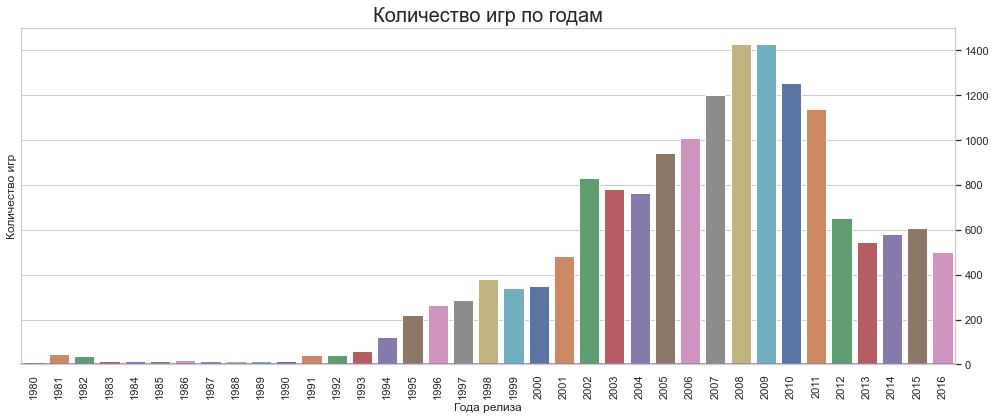

In [23]:
fig, ax = plt.subplots(figsize = (14, 6))
sns.barplot(x=game_of_year['year_of_release'], y=game_of_year['Count'], palette="deep", ax=ax)
ax.set(xlabel="Года релиза", ylabel='Количество игр')
ax.set_title('Количество игр по годам',fontsize=20)
for item in ax.get_xticklabels(): item.set_rotation(90)
ax.yaxis.tick_right()
ax.axhline(0, color="m", clip_on=False)
plt.tight_layout()

По графику можно определить несколько периодов развития игровой сферы. До середины 90х годов игр продавалось немного, до начала 2000х наметился рост и следующее десятилетие отметилось самыми большими продажами. С начала 10х годов количество отгруженых копий сокращается. Для предсказания продаж большая часть графика не годится, скорее для истории. Последнюю пятилетку, являющуюся стабильной можно рассматривать как перспективную, но можно и добавить исторических данных.

### Изменения продаж по платформам. Выбор платформ с наибольшими суммарными продажами. 

In [24]:
# ...Переделать в классы надо бы... разраслось. :()
# строит барплот из датафрейма, где есть 'platform','total_sales' отсортированные по возрастанию 
def plot_platform(dataframe, label, col_count, f_size, idx):
    plt.figure(figsize= f_size)  
    ax = sns.barplot(dataframe[idx], dataframe[col_count])  # барплот
    #ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:, }".format(int(x)))) запятые в тысячах по у. 
    ax.set(xlabel="Платформа", ylabel='Продажи, тысяч проданных копий') # 
    ax.set_title(label,fontsize=20)
    ax.set_xticklabels(dataframe[idx])    # названия по x
    for item in ax.get_xticklabels(): item.set_rotation(90)  # перевернуть на 90 град. названия по х
    for i, v in enumerate(dataframe[col_count].iteritems()):  # вывести       
        ax.text(i ,v[1], "{:,}".format(v[1]), color='g', va ='bottom', rotation= 75)
    plt.tight_layout()
    plt.show()

    # dataframe - frame с 'platform'
    # idx - столбец с категориями
    # col_count - столбец с данными для подсчета
    # top - сколько отобразить в топ
    # label - заголовок графика
    # f_size - figsize
    # rtrn = True - Возвращает сортированный топ датафрейм
    
def plot_top_platform(dataframe, idx, col_count, top, label, f_size, rtrn = True): 
    df_ = (dataframe.pivot_table(
        index = idx,
        values = col_count,
        aggfunc = 'sum')
    .sort_values(by = col_count, ascending = False)
    .head(top).reset_index()
    .reset_index(drop=True)
    )
    df_ = df_.sort_values([col_count])
    plot_platform(df_, label, col_count, f_size, idx)
    if rtrn:
        return df_

#### Выбор платформ с наибольшими суммарными продажами

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


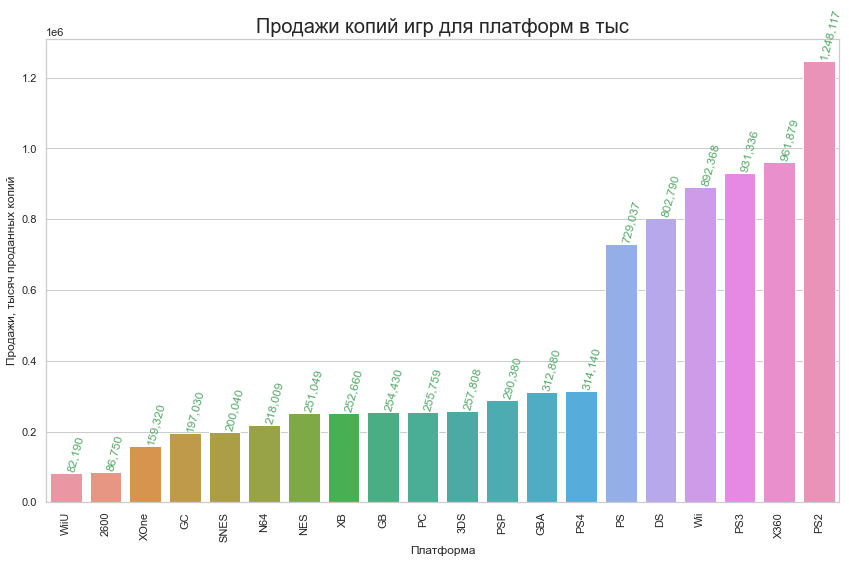

In [25]:
plot_top_platform(df, 'platform', 'total_sales', 20, 'Продажи копий игр для платформ в тыс', (12, 8),  False)


По графику видно, что особенно популярны 6 платформ с самыми большими продажами игр для них.

#### Построение распределений по годам платформ с наибольшими суммарными продажами

In [26]:
# фрейм с топ платформами
top_platform = 6   # переменная количества входящих в топ
top_platforms = df.groupby(['platform'])['total_sales'].sum().nlargest(top_platform)
df_top_platforms = df.query('platform in @top_platforms.index')


# Сводная таблица для платформ с наибольшими суммарными продажами
top_platforms_year = df_top_platforms.pivot_table(index = ['platform', 'year_of_release'], values = ['total_sales'], aggfunc = 'sum')
top_platforms_year = top_platforms_year.reset_index()

# группировка для графика
general_top = top_platforms_year.groupby(['year_of_release'])['total_sales'].sum().reset_index()
general_top.columns = ['year_of_release', 'total_sales']

In [27]:
# печатает график
def max_sale_platform(data):
    f, ax = plt.subplots(figsize=(14, 6))
    sns.lineplot('year_of_release', 'total_sales', 
                 hue='platform', data=data, palette="muted", linewidth=4)
    ax.set(xlabel = "Год", ylabel ='Продажи, тысяч проданных копий')
    ax.set_title('Платформы с наибольшими суммарными продажами по годам',fontsize=20)
    #.distplot(df_top_platforms['year_of_release'], kde=False, color="b", ax=ax)
    f.tight_layout()

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


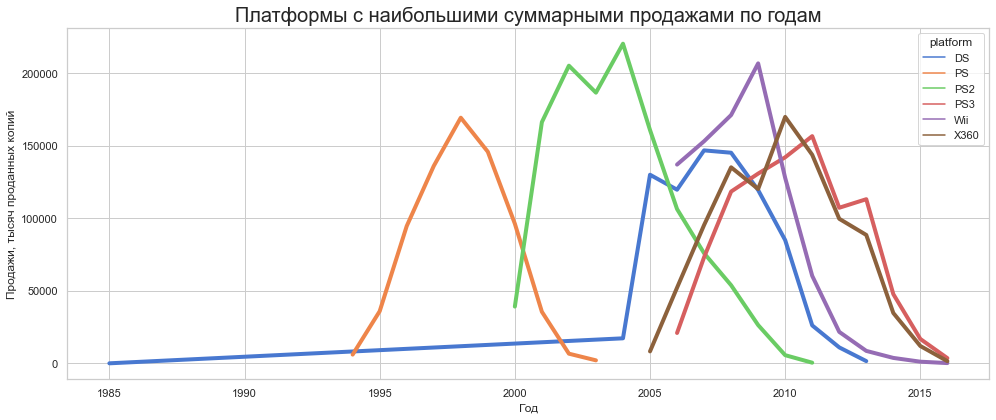

In [28]:
max_sale_platform(top_platforms_year)

Примерно за примерно одно десятилетие появляются новые и исчезают старые платформы. Возьмем за актуальный перид для простроения прогноза на 2017 год - срок "жизни" игровой платформы, а именно 2007 - 2016

In [29]:
# датафрейм с данными за актуальный период
actual_period = 2006  # нижняя граница актуального периода
df_actual_period = df.query('year_of_release > @actual_period')
#df_actual_period

#### Выбор нескольких потенциально прибыльных платформ.

In [30]:
# Сводная таблица для платформ с наибольшими суммарными продажами для графика
platforms_actual_period = df_actual_period.pivot_table(index = ['platform', 'year_of_release'], values = ['total_sales'], aggfunc = 'sum')
platforms_actual_period = platforms_actual_period.reset_index()

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


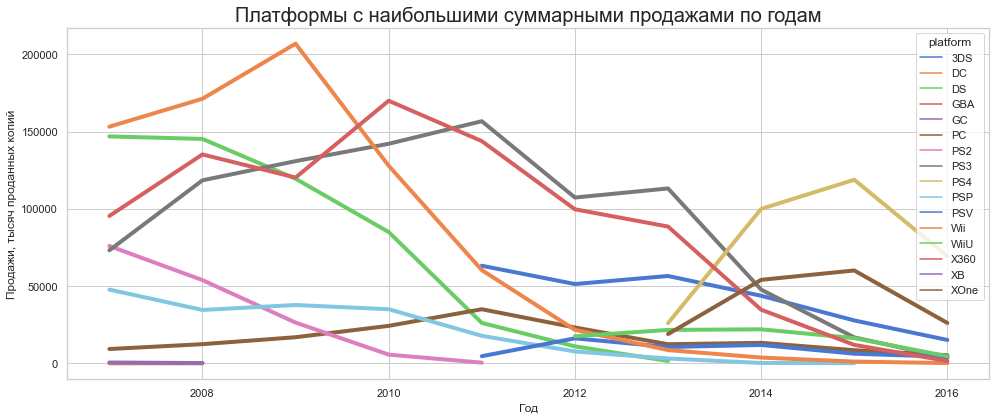

In [31]:
max_sale_platform(platforms_actual_period)

Все платформы на графике имеют тренд на снижение продаж на 2016 год, но так как за этот год данные не полные, ориентируемся на 2015 год, где явно выделяются два претендента с перспективой роста продаж. По продажам на крайний год с отрывом лидируют три платформы. Хотя "3DS" и находится в падении, она берет на себя значительную часть продаж, и находится на половине пути своей "жизни". PSV также находится на середине срока старения, но тот же производитель выпустил более новую платформу, которая более популярна. А так как продажи на платформу PSV очень небольшие, то включать в дальнейшее исследование её не будем. Определим три платформы: "PS4", "XOne" и "3DS" как потенциально прибыльные: 

In [32]:
(print('Лидеры продаж на', platforms_actual_period['year_of_release'].max(), 'год \n', 
       platforms_actual_period[platforms_actual_period['year_of_release'] == platforms_actual_period['year_of_release'].max()]
       .sort_values(by = 'total_sales', ascending = False)
       .head(3))
)

Лидеры продаж на 2016 год 
    platform  year_of_release  total_sales
45      PS4             2016        69250
91     XOne             2016        26150
5       3DS             2016        15140


#### Диаграмма размаха по глобальным продажам игр в разбивке по платформам.

In [33]:
# Извлекаем названия перспективных платформ
list_top_platforms = (
    platforms_actual_period[
        platforms_actual_period['year_of_release'] == platforms_actual_period['year_of_release'].max()
    ]
       .sort_values(by = 'total_sales', ascending = False)
       .head(3)['platform']
       .tolist()
)
# извлекаем из датафрейма с актуальным периодом данные по перспективным платформам
df_total = df_actual_period.query('platform in @list_top_platforms')

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

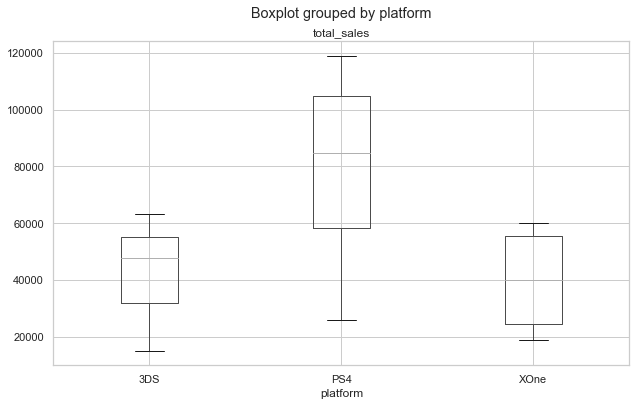

In [34]:
box_df_total = df_total.pivot_table(index = ['platform', 'year_of_release'], values = ['total_sales'], aggfunc = 'sum')
box_df_total = box_df_total.reset_index()
box_df_total.boxplot('total_sales', by='platform', showfliers = False, figsize = (10, 6))

Sony PS4 является самой потенциально прибыльной платформой, в средем почти вдвое опережая по продажам следующую платформу. 3DS имеет большее число продаж, чем XOne, но XOne более стабильна и распределена близко к нормальному.

### Изучение влияния отзывов пользователей и критиков на продажи игр для топовой платформы

In [35]:
#Создаем словарь с датафреймами популярных платформ

dict_df_top_platforms = {}
def get_df_top_platforms (top_list):
    for platform in top_list:
        #print('platform == "'+platform+'"')
        df_ =  df_total.query('platform == "'+platform+'"')
        df_ = df_.loc[:, ['critic_score', 'user_score','total_sales']]
        dict_df_top_platforms['df_total_' + platform] = df_

get_df_top_platforms(list_top_platforms)


globals().update(dict_df_top_platforms)

Попарные отношения оценок и количеством продаж "ps4"

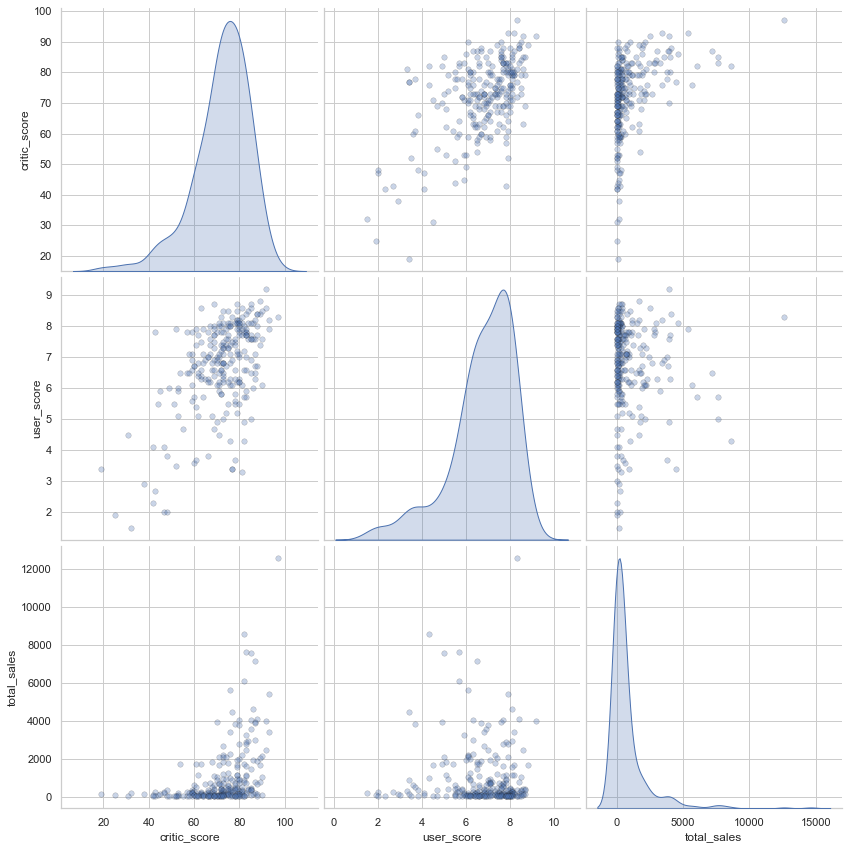

In [36]:

sns.pairplot(df_total_PS4, diag_kind = 'kde',
             plot_kws = {'alpha': 0.3, 's': 30, 'edgecolor': 'k'},
             height = 4)


Взаимозависимость двух величин называется корреляция. Она помогает определить, как сильно меняется одна величина при изменении другой, и принимает значения от - 1 до 1 

---

Интерпретация значений коэффициента корреляции

* до 0,2	Очень слабая
* до 0,4	Слабая
* до 0,6	Средняя
* до 0,8	Высокая
* свыше 0,8	Очень высокая корреляция  
---
Чем ближе корреляция к -1 или 1, тем сильнее связь между переменными. При нулевом значении (или близким к 0) значимая связь между 2-мя переменными отсутствует или очень минимальна

Попарная корреляция оценок и продаж

<AxesSubplot:title={'center':'Зависимости PS4'}>

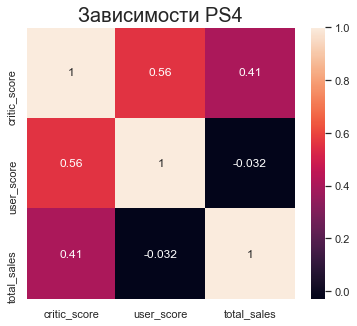

In [37]:
plt.figure(figsize = (6,5))
plt.title('Зависимости PS4',fontsize=20)
sns.heatmap(df_total_PS4.corr(method='pearson'),annot=True)

Зависимость продаж от оценок критиков и пользователей.

In [38]:
def get_correlations(dataframe, name =''):
    display('Корреляция: '+ name, dataframe.corr(method='pearson')['total_sales'].sort_values(ascending = False))

In [39]:
get_correlations(df_total_PS4, 'PS4')

'Корреляция: PS4'

total_sales     1.000000
critic_score    0.406568
user_score     -0.031957
Name: total_sales, dtype: float64

Имеется слабая зависимость от отзывов критиков, немного большая общих результатов. Отзывы пользователей практически не влияют на количество проданных копий. И даже принимают отрицательный характер, где при положительном отзыве падают продажи.

#### Соотношение продаж для PS4 с продажами игр на других платформах.

Общая зависимость по всему датасету

<AxesSubplot:title={'center':'Взаимная зависимость'}>

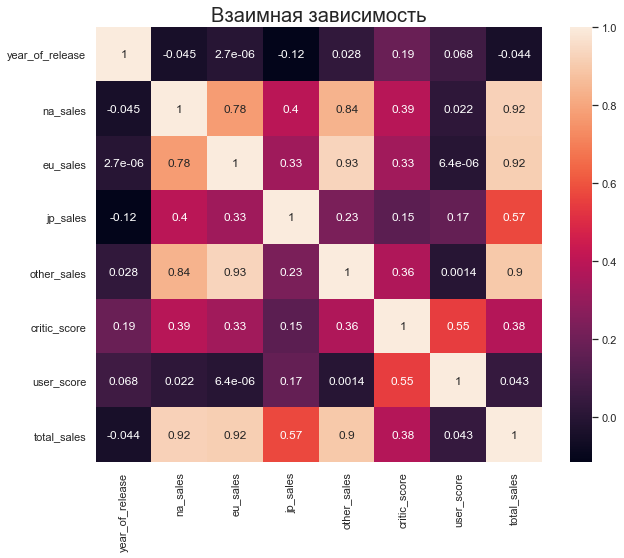

In [40]:
plt.figure(figsize = (10,8))
plt.title('Взаимная зависимость',fontsize=20)
sns.heatmap(df_total.corr(method='pearson'),annot=True)

На продажи в общем плане критики имеют слабое влияние, а пользователи не влияют практически никак.

Совместное рассеяние оценок и количеством продаж потенциально прибыльных платформ

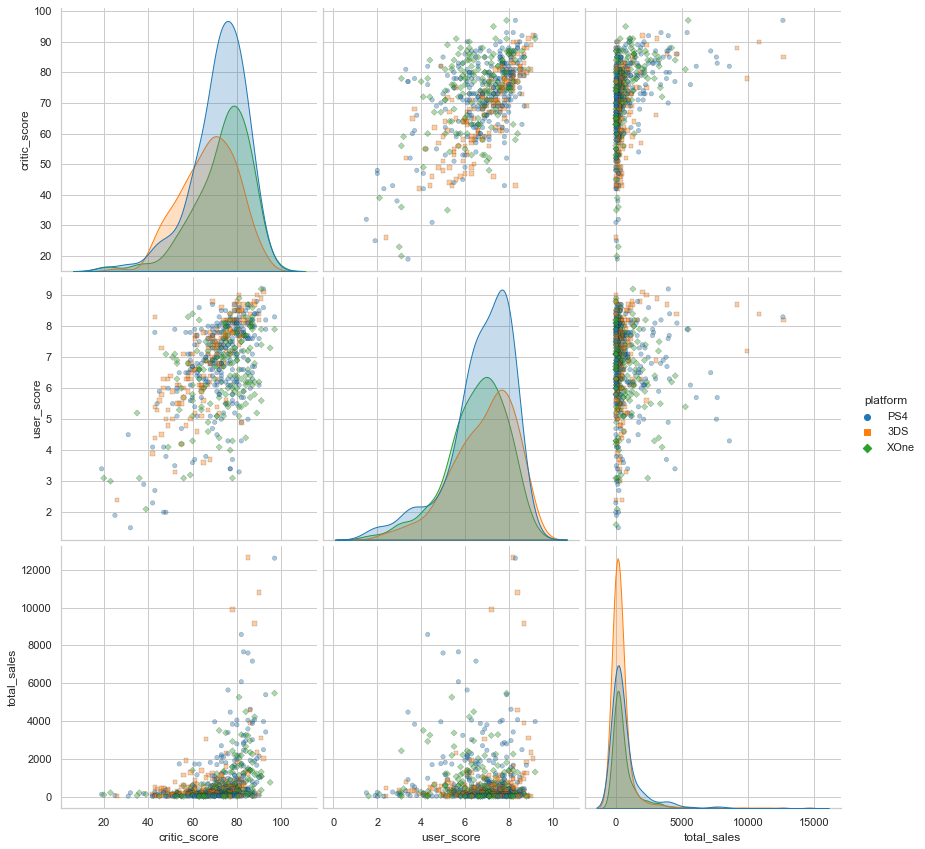

In [41]:
df_pairplot = df_total.loc[:, ['platform', 'critic_score', 'user_score','total_sales']]
sns.pairplot(df_pairplot, hue = 'platform', diag_kind = 'kde',
             plot_kws = {'alpha': 0.4, 's': 20, 'edgecolor': 'k'},
             height = 4, markers = ['o',  's',  'D'], palette="tab10")

In [42]:
for name, data in dict_df_top_platforms.items():
    print('='*40)
    get_correlations(data, name)

'Корреляция: df_total_PS4'

total_sales     1.000000
critic_score    0.406568
user_score     -0.031957
Name: total_sales, dtype: float64

'Корреляция: df_total_XOne'

total_sales     1.000000
critic_score    0.416998
user_score     -0.068925
Name: total_sales, dtype: float64

'Корреляция: df_total_3DS'

total_sales     1.000000
critic_score    0.348743
user_score      0.222080
Name: total_sales, dtype: float64

Пользователи 3DS имеют большее, но все же слабое влияние на продажи. Критики имеют меньшую роль во влиянии на продажи в сравнении с остальными платформами. XOne имеет схожие показатели с PS4.

### Исследование общего распределения игр по жанрам. Прибыльность жанров

In [43]:
df_genre = df_total.pivot_table(index = 'genre', values = ['total_sales'], aggfunc = 'sum')
df_genre.reset_index(inplace = True)

In [44]:
def plot_pie(df, col_count, col_labels, title, f_size = (5,5)):
    fig, ax = plt.subplots(figsize = f_size)
    ax.pie(df[col_count], labels = df[col_labels], autopct='%.1f%%',
            shadow=True, startangle=90)
    ax.set_title(title,fontsize=20)
    plt.show()

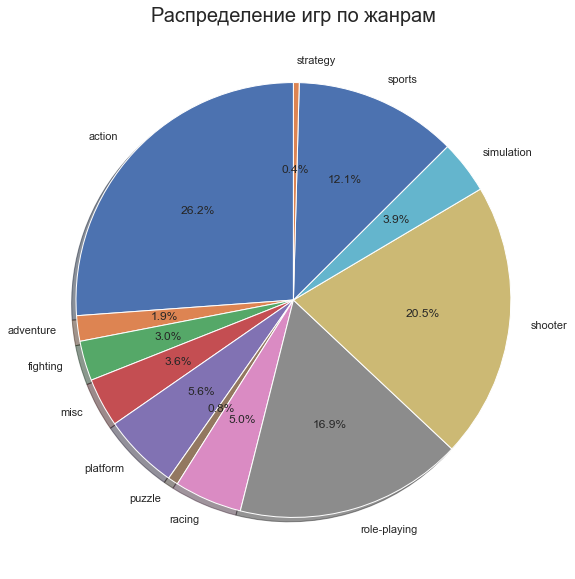

In [45]:
plot_pie(df_genre, 'total_sales', 'genre', 'Распределение игр по жанрам', (10,10) )

Самыми прибыльными жанрами являются 3D игры от первого лица: action, shooter, ролевые и спортивные игры.

#### Продажи жанров с высокими и низкими продажами

Определяем жанры с продажами выше и ниже обычных. 

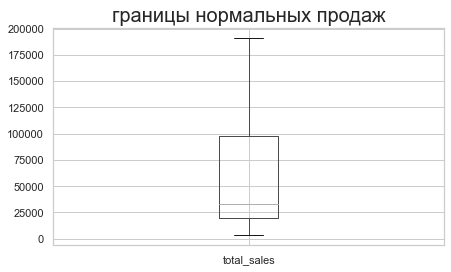

Жанром с нормальной продажей будут являться жанры с количеством продаж выше 19707.5 и ниже 97310.0


In [46]:
fig, ax = plt.subplots(figsize = (7,4))
ax.set_title('границы нормальных продаж',fontsize=20)
df_genre.boxplot('total_sales')
plt.show()

limit_hi_sale = df_genre['total_sales'].quantile(0.75)
limit_lo_sale = df_genre['total_sales'].quantile(0.25)
(print('Жанром с нормальной продажей будут являться жанры с количеством продаж выше {0} и ниже {1}'
      .format(limit_lo_sale, limit_hi_sale))
)

In [47]:
# возвращает критерий от параметров limit_hi_sale, limit_lo_sale 
def create_hi_lo_sale_genre (row):
    sales = row['total_sales']
    if sales > limit_hi_sale:
        return 'Высокий'
    if sales < limit_lo_sale:
        return 'Низкий'
    return 'Нормальный'

def insert_percent(df, col_count):
    df['percents'] = round(df[col_count] / df[col_count].sum()*100, 1) # с округлением (1)

In [48]:
# подготовка данных всех жанров
df_genre['sale_genre'] = df_genre.apply(create_hi_lo_sale_genre, axis=1)
insert_percent(df_genre, 'total_sales')

In [49]:
# топ жанров
top_genre = df_genre.sort_values(by = 'total_sales', ascending = False)
display('Самые покупаемые жанры:', top_genre.head(3))
display('Жанры "на любителя":', top_genre.tail(3))

'Самые покупаемые жанры:'

,genre,total_sales,sale_genre,percents
0,action,191250,Высокий,26.2
8,shooter,150110,Высокий,20.5
7,role-playing,123740,Высокий,16.9


'Жанры "на любителя":'

,genre,total_sales,sale_genre,percents
1,adventure,13850,Низкий,1.9
5,puzzle,5590,Низкий,0.8
11,strategy,3130,Низкий,0.4


Соотношение жанров с высокой и низкой покупаемостью

In [50]:
df_genre.pivot_table(index = 'sale_genre', values = ['total_sales', 'percents'], aggfunc = 'sum')

,percents,total_sales
sale_genre,,
Высокий,63.6,465100
Низкий,3.1,22570
Нормальный,33.2,243598


Жанры игр с высокими продажами состовляют 63.6% продож от всех остальных жанров. На неудачные жанры приходится 3,1% продаж

## Вывод
Изучены игры для конкретных платформ в парзличные периоды, их количество, продаваемость. 

Выбрана группа платформ с наибольшими суммарными продажами и изучены суммарные продажи каждой платформы по годам. По графику определен срок "жизни" игровой платформы,состовляющий 10 лет. Отсюда определили актуальный период с 2007 по 2016 года, для прогноза на 2017 год. В этом периоде по графику выделили потенциально прибыльные платформы. Ими оказались "PS4", "XOne" и "3DS". Sony PS4 является самой потенциально прибыльной платформой.

Выявили, что влияние отзывов критиков на продажи игр для топовой платформы слабое. Отзывы пользователей практически не влияют на количество проданных копий. И даже принимают отрицательный характер, где при положительном отзыве падают продажи. В сравнении с PS4 ( -0.031957), пользователи 3DS имеют большее(0.222080), но все же слабое влияние на продажи. Критики имеют меньшую роль во влиянии на продажи (0.348743) в сравнении с остальными платформами (0.406568 и 0.416998). XOne имеет схожие показатели с PS4.

Исследование жанрам определило, что самыми прибыльными жанрами являются 3D игры от первого лица: action, shooter, ролевые и спортивные игры. Самыми покупаемыми жанрами являются: action, shooter, role-playing, на которые приходится 63.6% продаж, а самые низкопокупаемые: adventure, puzzle и strategy с малыми 3.1%.

Таким образом наиболее перспективные платформы: "XOne", "3DS" и лидер "PS4", и жанры: action, shooter, role-playing.

## 4. Составление портрета пользователя каждого региона

### Топ 5 популярных платформ для пользователя каждого региона (NA, EU, JP). 

In [51]:
list_region = ['na_sales', 'eu_sales', 'jp_sales'] # столбцы по которым будет запрос 

dict_region_df = {} # словарь с фреймами по регионам: 'na_sales', 'eu_sales', 'jp_sales'
    # функция формирует в словаре таблицы с регионами из актуальых данных временного периода
def get_region_df(columns_region):
    for column in columns_region:
        df_ =  df_actual_period.loc[:, ['platform', 'genre', 'rating', column]]
        dict_region_df[column] = df_ 

get_region_df(list_region)

globals().update(dict_region_df)

In [52]:
# удаляем строки с нулевыми продажами
for name, df_ in dict_region_df.items():
    query = name+ ' == 0'
    df_.drop(df_.query(query).index, inplace=True)

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


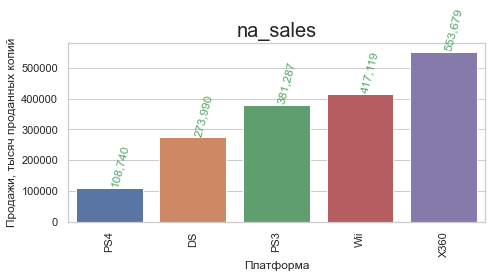

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


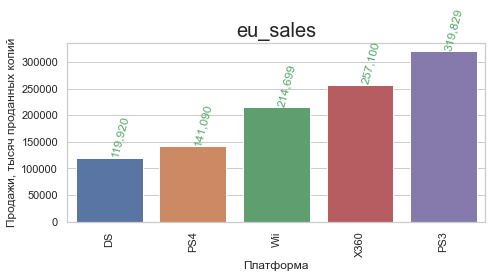

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


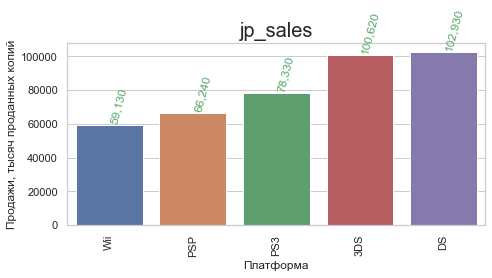

In [53]:
# не наглядный график. цвета путаются :(
# топ 5 платформ по популярности в каждом регионе
dict_region_top_platform = {}  # сразу создаем таблицы с топ 5 платформами по продажам
for name, df_ in dict_region_df.items():
    nametop = name.split("_")[0]+'_top' # "Придумываем" имя будующим таблицам 'na_top', 'eu_top', 'jp_top'
    #print(nametop)                    #plot_top_platform(dataframe, idx, col_count, top, label, f_size, rtrn = True)
    dict_region_top_platform[nametop] = plot_top_platform(df_, 'platform', name, 5, name, (7, 4))  #  Заодно выведем графики топов
globals().update(dict_region_top_platform) # в глобальное пространство имен



In [54]:
# Добавляем в таблицы  доп. столбцы 
def insert_region_percent(dict_top):
    for name, df_ in dict_top.items():
        insert_percent(df_, df_.columns[1])  # Добавляем долю продаж
        df_['region'] = (name.split("_")[0]).upper() # Добавляем колонку с регионом
        df_.rename({df_.columns[1]: 'sales'}, axis=1, inplace=True) # переименовываем поле продаж по регионам в 'sales'  
        #plot_pie(df_, df_.columns[1], df_.columns[0], name, (5,5) ) # тут можно пироги наплодить. не наглядно.


In [55]:
insert_region_percent(dict_region_top_platform)

In [56]:
# Сводим 'na_top', 'eu_top', 'jp_top' в таблицу с долями
top_platform_by_region =  na_top.merge(eu_top, how = 'outer')
top_platform_by_region = top_platform_by_region.merge(jp_top, how = 'outer')
print('Таблица долей продаж на каждую платформу по регионам')
#top_by_region.pivot_table(index= ['region'], columns = 'platform', values = 'percents')
top_platform_by_region_plot = top_platform_by_region.pivot_table(index= ['platform'], columns = 'region', values = 'percents')
top_platform_by_region_plot

Таблица долей продаж на каждую платформу по регионам


region,EU,JP,NA
platform,,,
3DS,NaN,24.7,NaN
DS,11.4,25.3,15.8
PS3,30.4,19.2,22.0
PS4,13.4,NaN,6.3
PSP,NaN,16.3,NaN
Wii,20.4,14.5,24.0
X360,24.4,NaN,31.9


Text(0.5, 1.0, 'Распределение по регионам')

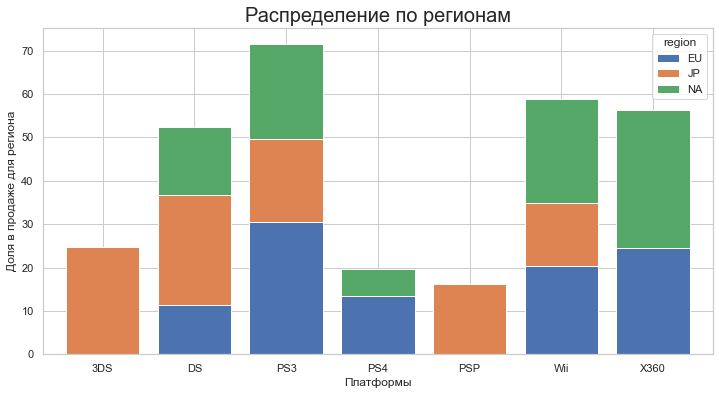

In [57]:
ax = top_platform_by_region_plot.plot.bar(width=0.8, rot=0, figsize = (12,6), stacked=True)
ax.set(xlabel = "Платформы", ylabel ='Доля в продаже для региона')
ax.set_title('Распределение по регионам',fontsize=20)


Доли продаж игр для конкретных платформ EU региона и NA примерно одинаковы и популярность платформ соответствует: это PS3, X360, Wii, PS4, DS. Регион JP предпочитает только им присущие 3DS, PSP, а также в большей доле, чем остальные регионы DS, в меньших PS3 и Wii.

### Топ-5 самых популярныех жанров пользователя каждого региона (NA, EU, JP) 

In [58]:
# возвращает топ из датафреймов с категориями
# dataframe, фрейм данных
# idx, столбец с категориями
# col_count, столбец с количественными данными
# top сколько вернуть значений
def get_top_all(dataframe, idx, col_count, top): 
    df_ = (dataframe.pivot_table(
        index = idx,
        values = col_count,
        aggfunc = 'sum')
    .sort_values(by = col_count, ascending = False)
    .head(top).reset_index()
    .reset_index(drop=True)
    )
    df_ = df_.sort_values([col_count])
    return df_

In [59]:
# словарь топ жанров по популярности в каждом регионе
dict_region_top_genre = {}  # сразу создаем таблицы с топ 5 жанрами по продажам
for name, df_ in dict_region_df.items():
    nametop = name.split("_")[0]+'_top_genre' # "Придумываем" имя будующим таблицам 'na_top_genre', 'eu_top_genre', 'jp_top_genre'
    #print(nametop)
    dict_region_top_genre[nametop] = get_top_all(df_, 'genre', name, 5) #  без графиков
    
globals().update(dict_region_top_genre) # в глобальное пространство имен

In [60]:
insert_region_percent(dict_region_top_genre)

In [61]:
# Сводим в таблицу с долями
top_genre_by_region =  na_top_genre.merge(eu_top_genre, how = 'outer')
top_genre_by_region = top_genre_by_region.merge(jp_top_genre, how = 'outer')
print('Таблица долей продаж на каждый жанр по регионам')
#top_by_region.pivot_table(index= ['region'], columns = 'platform', values = 'percents')
top_genre_by_region_plot = top_genre_by_region.pivot_table(index= ['genre'], columns = 'region', values = 'percents')
top_genre_by_region_plot

Таблица долей продаж на каждый жанр по регионам


region,EU,JP,NA
genre,,,
action,33.2,26.5,30.7
adventure,NaN,7.4,NaN
misc,12.6,13.4,16.2
racing,10.4,NaN,NaN
role-playing,NaN,41.5,10.9
shooter,22.8,NaN,21.8
sports,21.0,11.1,20.3


Text(0.5, 1.0, 'Распределение жанров по регионам')

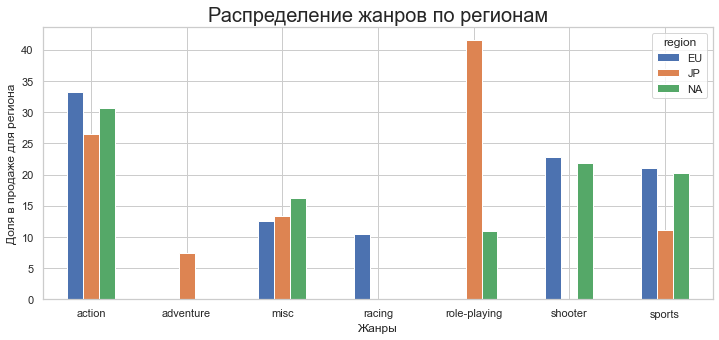

In [62]:
ax = top_genre_by_region_plot.plot.bar(width=0.5, rot=0, figsize = (12,5))
ax.set(xlabel = 'Жанры', ylabel ='Доля в продаже для региона')
ax.set_title('Распределение жанров по регионам',fontsize=20)

Также как и с платформами, жанровые предпочтения регионов EU и NA примерно одинаковые, с небольшим различием, что в малой доле от всех жанров (10.4 и 10.9 соответственно) EU любят заезды а NA ролевые игры. JP регион снова отличается. Там role-playing с 41.5% выносит этот жанр в топы по общим продажам. Далее action, misc, sports, adventure. а вот стрелять в этом регионе не любят.

### Изучение влияния рейтинга ESRB на продажи в отдельном регионе

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Рейтинг игр ESRB основан на их содержании аналогично рейтинговым системам кинофильмов.

Краткая расшифровка:
* «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше.
* «E» («Everyone») — «Для всех», Первоначально "K-A" ("Kids to Adults"): Содержание вполне подходит для возрастной категории от 6 лет и старше.
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
* «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
* «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

взято с :https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board



In [63]:
# Таблица с рейтингами и продажами за актуальный период
df_rating = df_actual_period.loc[:, ['rating', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']]

Для изучения зависимости от рейтингового фактора попробуем ранжировать список по годам, соответствующим этому рейтингу.

In [64]:
rating_esrb = {'EC':3, 'E':6, 'K-A':6, 'E10+':10, 'T':13, 'M':17, 'AO':18}

def calculation_rating (row): 
    if row in rating_esrb:
        return rating_esrb[row]
    else:
        return np.nan

In [65]:
df_rating['age_rating'] = df_rating['rating'].apply(calculation_rating)
#df_rating.dropna('age_rating', inplace = True)

Смотрим влияние возрастного рейтинга на продажи по регионам

<AxesSubplot:>

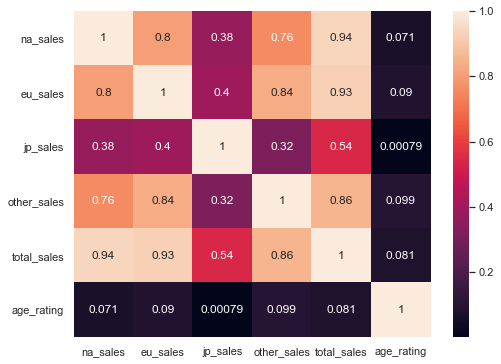

In [66]:
# зависимости в таблице
plt.figure(figsize = (8,6))
sns.heatmap(df_rating.corr(method='pearson'),annot=True)

Никакого влияния на продажи от содержимого рейтинга не обнаружено.

Проверим влияние наличия рейтинга на продажи, т.е. Игры, прошедшей оценку.

In [67]:
df_rating['valued_rate'] = df_rating['rating'].notnull()

In [68]:
df_rating_impact = df_rating.pivot_table(
    index = 'valued_rate', 
    values = ['eu_sales', 'jp_sales', 'na_sales', 'other_sales', 'total_sales'], 
    aggfunc = 'sum')
df_rating_impact.reset_index(inplace = True)
df_rating_impact = df_rating_impact.pivot_table(columns = ['valued_rate'])


Text(0.5, 1.0, 'Продажи с оценкой ESRB и без')

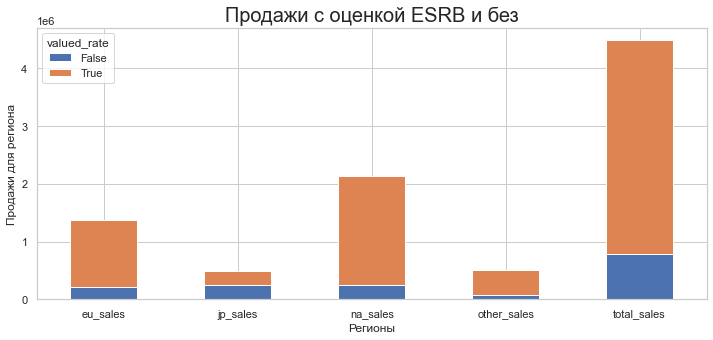

In [69]:
ax = df_rating_impact.plot.bar(width=0.5, rot=0, figsize = (12,5), stacked=True)
ax.set(xlabel = 'Регионы', ylabel ='Продажи для региона')
ax.set_title('Продажи с оценкой ESRB и без',fontsize=20)

Игры с наличием рейтинга в регионах EU и NA составляют значительную часть, возможно из-за политики запретов игр без рейтингов, и игр без рейтинга просто не купить. В JP регионе эта организация имеет гораздо меньшее влияние.

## Вывод
* Пользователь региона NA это обладатель x360 или Wii, PS3, DS, PS4 в меньшей вероятности, играющий динамичные игры жанра action, shooter, sport, который прислушивается к рейтинговой организации ESRB.
* Пользователь региона EU это обладатель PS3 или x360, Wii, PS4, DS в меньшей вероятности, играющий динамичные игры жанра action, shooter, sport иногда racing, который прислушивается к рейтинговой организации ESRB.
* Пользователь региона JP это обладатель DS, 3DS или PS3, PSP в меньшей вероятности, играющий спокойные игры жанра role-playing, action не любит shooter и рейтинг ESRB.

## 5. Проверка гипотез

Гипотезы являетюся двусторонними. Две группы проверяемых количественных значений, в каждой проверяемой гипотезе являются независимыми. Для проверки будет использоваться T-критерий Стьюдента для средних значений двух независимых выборок. Это двусторонний тест для нулевой гипотезы о том, что 2 независимые выборки имеют одинаковые средние (ожидаемые) значения. Этот тест предполагает, что популяции имеют одинаковые отклонения по умолчанию.Тест измеряет, является ли среднее (ожидаемое) значение существенно отличается в разных выборках. Если мы наблюдаем большое значение p, например больше alpha = 0,05 или 0,1, тогда мы не можем отвергнуть нулевую гипотезу об одинаковых средних баллах. Если значение p меньше порогового значения alpha, тогда мы отвергаем нулевую гипотезу о равных средних значениях.

In [70]:
# совместное распределение данных с отображением нормального распределения функции плотности вероятности
def print_distplot(name, column, binss):
    sns.distplot(column, hist=True, fit=st.norm, kde=False, bins = binss, label = name)
    
    
def hist_norm (df_list, binss=15):
    fig = plt.figure(figsize=(12, 5))
    for name, column in df_list.items():
        print_distplot(name, column, binss)
    fig.legend(loc = 'upper right', fontsize = 18)
    fig.tight_layout()

In [71]:
# Т-Критерий Стьюдента
def t_criteria_student(frame1, frame2, alpha = .05):
    results = st.ttest_ind(frame1, frame2)
    print('p-значение:', results.pvalue)
# если p-value окажется меньше критический уровеня статистической значимости - отвергнем гипотезу
    if (results.pvalue < alpha):    
        print("Отвергаем нулевую гипотезу")
    else:
        print("Нет оснований для отвержения нулевой гипотезы.")

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [72]:
# Dataframe для гипотезы
hypothesis_1 = df_actual_period.loc[:, ['user_score', 'platform']].dropna()

Посмотрим на графике совместное распределение платформ Xbox One и PC с отображением нормального распределения функции плотности вероятности

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


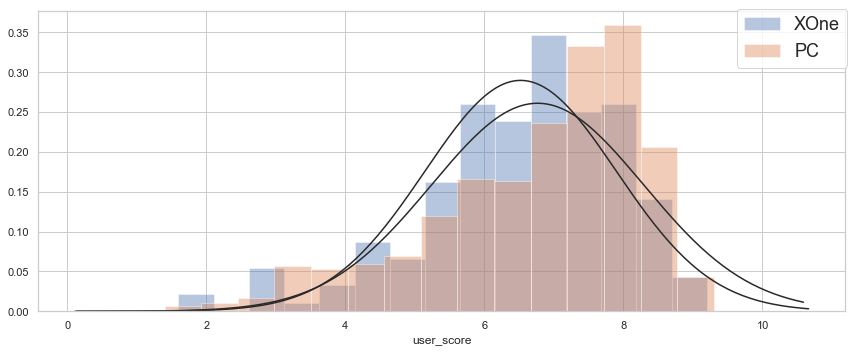

In [73]:
hist_list = {
    'XOne':hypothesis_1[hypothesis_1['platform'] == 'XOne']['user_score'],
    'PC':hypothesis_1[hypothesis_1['platform'] == 'PC']['user_score']
}
hist_norm (hist_list, binss=15)

**Проверим, что пользовательские рейтинги платформ Xbox One и PC одинаковые**

Формируем нулевую гипотезу H₀:
- **«Да, пользовательские рейтинги платформ Xbox One и PC одинаковые»**, то есть исследуемые параметры равны.

Исходя из H₀ формулируется альтернативная гипотеза H₁: 
- **«Нет, пользовательские рейтинги платформ Xbox One и PC различается»**

In [74]:
t_criteria_student(hist_list['XOne'], hist_list['PC'], alpha = .05)

p-значение: 0.05554752084307562
Нет оснований для отвержения нулевой гипотезы.


### Вывод по гипотезе
Да, пользовательские рейтинги платформ Xbox One и PC одинаковые

### Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [75]:
# Dataframe для гипотезы
hypothesis_2 = df_actual_period.loc[:, ['user_score', 'genre']].dropna()

Посмотрим на графике совместное распределение жанров Action и Sports с отображением нормального распределения функции плотности вероятности

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


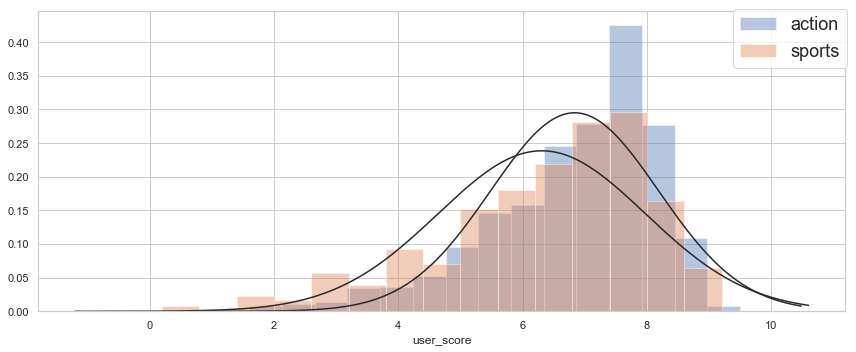

In [76]:
hist_list = {
    'action':hypothesis_2[hypothesis_2['genre'] == 'action']['user_score'],
    'sports':hypothesis_2[hypothesis_2['genre'] == 'sports']['user_score']
}
hist_norm (hist_list, binss=15)

**Проверим, Средние пользовательские рейтинги жанров Action и Sports на равенство.**


Исходя из природы Т критерия - о равенстве сравниваемых групп, формируем нулевую гипотезу H₀:

* **«Нет, разницы в средних пользовательских рейтингах жанров Action и Sports нет»**, то есть исследуемые параметры равны.

Исходя из H₀ формулируется альтернативная гипотеза H₁:

* **«Да, средние пользовательские рейтингаи жанров Action и Sports различаются»**

In [77]:
t_criteria_student(hist_list['action'], hist_list['sports'], alpha = .05)

p-значение: 9.605489917248868e-13
Отвергаем нулевую гипотезу


### Вывод по гипотезе
Да, средние пользовательские рейтингаи жанров Action и Sports различаются

## 6. Общий вывод

Данные читаются, загружены, просмотрены "глазами", обнаружены и исправлены пропуски, изменены типы данных и ошибки. добавлена дополнительная информация по суммарным продажам в 'total_sales'. Составлен баг-репорт.

Изучены игры для конкретных платформ в парзличные периоды. Их количество, показало, что  можно определить несколько периодов развития игровой сферы. До середины 90х годов игр продавалось немного, до начала 2000х наметился рост и следующее десятилетие отметилось самыми большими продажами. С начала 10х годов количество отгруженых копий сокращается. Для предсказания продаж большая часть графика не годится, скорее для истории. Последнюю пятилетку, являющуюся стабильной можно рассматривать как перспективную, но можно и добавить исторических данных. По графику продаваемости особенно популярны 6 платформ с самыми большими продажами игр для них: PS2,X360,PS3,DS,Wii,PS

Выбрана группа платформ с наибольшими суммарными продажами и изучены суммарные продажи каждой платформы по годам. По графику определен срок "жизни" игровой платформы,состовляющий 10 лет. Отсюда определили актуальный период с 2007 по 2016 года, для прогноза на 2017 год. В этом периоде по графику выделили потенциально прибыльные платформы. Ими оказались "PS4", "XOne" и "3DS". Sony PS4 является самой потенциально прибыльной платформой.

Выявили, что влияние отзывов критиков на продажи игр для топовой платформы слабое. Отзывы пользователей практически не влияют на количество проданных копий. И даже принимают отрицательный характер, где при положительном отзыве падают продажи. В сравнении с PS4 ( -0.031957), пользователи 3DS имеют большее(0.222080), но все же слабое влияние на продажи. Критики имеют меньшую роль во влиянии на продажи (0.348743) в сравнении с остальными платформами (0.406568 и 0.416998). XOne имеет схожие показатели с PS4.

Исследование жанров определило, что самыми прибыльными жанрами являются 3D игры от первого лица: action, shooter, ролевые и спортивные игры. Самыми покупаемыми жанрами являются: action, shooter, role-playing, на которые приходится 63.6% продаж, а самые низкопокупаемые: adventure, puzzle и strategy с малыми 3.1%.

* Таким образом наиболее перспективные платформы: "XOne", "3DS" и лидер "PS4", и жанры: action, shooter, role-playing.

Описаны типичные пользователи регионов:

* Пользователь региона NA это обладатель x360 или Wii, PS3, DS, PS4 в меньшей вероятности, играющий динамичные игры жанра action, shooter, sport, который прислушивается к рейтинговой организации ESRB.
* Пользователь региона EU это обладатель PS3 или x360, Wii, PS4, DS в меньшей вероятности, играющий динамичные игры жанра action, shooter, sport иногда racing, который прислушивается к рейтинговой организации ESRB.
* Пользователь региона JP это обладатель DS, 3DS или PS3, PSP в меньшей вероятности, играющий спокойные игры жанра role-playing, action не любит shooter и рейтинг ESRB.

Проверка гипотез показала:
* пользовательские рейтинги платформ Xbox One и PC одинаковые
* средние пользовательские рейтингаи жанров Action и Sports различаются

## bug report

В столбце "user_score" на числовых, по-факту, данных установлен тип данных object. Возможно ошибка выгрузки.